## Data Exploration

#### Import dependencies

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

#### Data Loading

In [2]:
df =pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# shape of dataframe
df.shape

(205, 26)

In [4]:
# dtypes and null value count of column 
df.info()
'''
There are null values present in fueltype,enginesize,fuelsystem and price.
Data types are correcly assigned.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          189 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        204 non-null    float64
 1

'\nThere are null values present in fueltype,enginesize,fuelsystem and price.\nData types are correcly assigned.\n'

In [5]:
# Five Point Summary
'''
compressionratio and price are highly skewed feature
'''
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,204.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,202.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.862745,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13306.760728
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.740233,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7985.699087
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7823.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10320.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,142.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16502.250000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.946838
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.796408
dtype: float64

<AxesSubplot:ylabel='Frequency'>

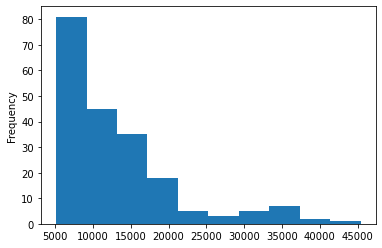

In [7]:
df.price.plot.hist()

## Data Cleaning

#### 1. Missging Values

In [8]:
df.isnull().sum()/df.shape[0]*100

car_ID              0.000000
symboling           0.000000
CarName             0.000000
fueltype            7.804878
aspiration          0.000000
doornumber          0.000000
carbody             0.000000
drivewheel          0.000000
enginelocation      0.000000
wheelbase           0.000000
carlength           0.000000
carwidth            0.000000
carheight           0.000000
curbweight          0.000000
enginetype          0.000000
cylindernumber      0.000000
enginesize          0.487805
fuelsystem          6.829268
boreratio           0.000000
stroke              0.000000
compressionratio    0.000000
horsepower          0.000000
peakrpm             0.000000
citympg             0.000000
highwaympg          0.000000
price               1.463415
dtype: float64

gas       169
diesel     20
Name: fueltype, dtype: int64
0    gas
dtype: object


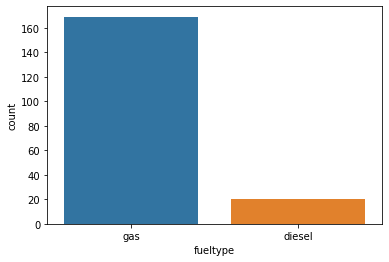

In [9]:
# Missing values Treatment

# 1.fueltype: can fill with mode='gas'

print(df.fueltype.value_counts())
sns.countplot(df.fueltype)
print(df.fueltype.mode())

In [10]:
df.fueltype.fillna("gas",inplace=True)

In [11]:
# 2. enginesize: can remove it, since only single value is none
df.isnull().sum()

car_ID               0
symboling            0
CarName              0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           1
fuelsystem          14
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price                3
dtype: int64

In [12]:
df = df[df["enginesize"].notna()]

In [13]:
# 3. fuelsystem : can fill with mode='mpfi'
df.fuelsystem.value_counts()

mpfi    79
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [14]:
df.fuelsystem.fillna("mpfi",inplace=True)

In [15]:
# 4. price : we cant tolerate target variable with null hence can remove it
df = df[df["price"].notna()]

In [16]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### 2. Remove Duplicate Or Unnecessary Data



#### 3. Label Consistency


In [107]:
Name = "Shubham"
Surname = "patil"
print(f"my name is = {Name} surname is={Surname}")

my name is =Shubham surname is=patil


## Outlier Detection

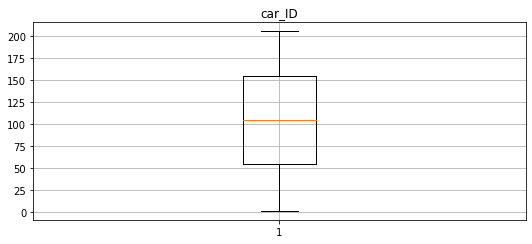

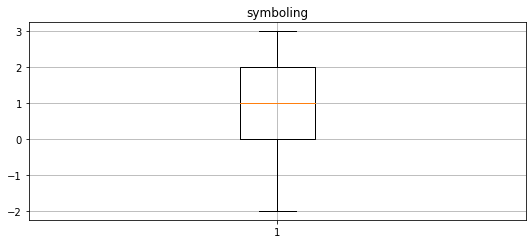

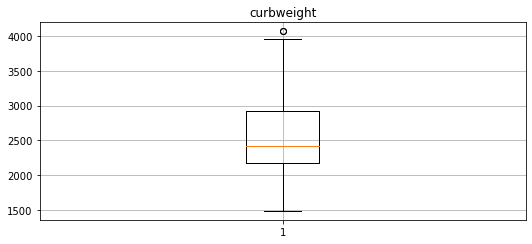

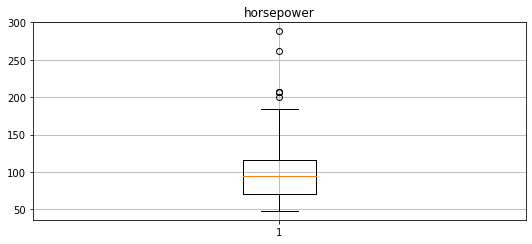

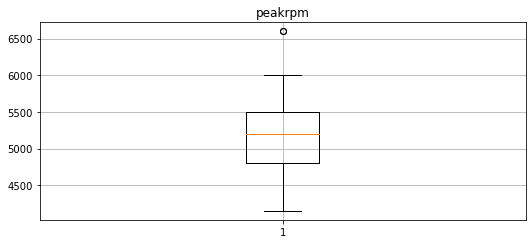

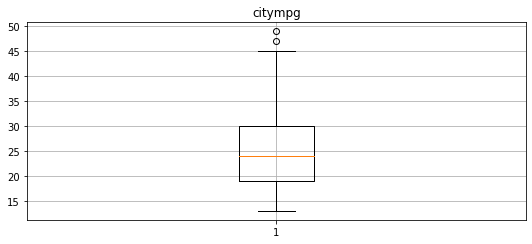

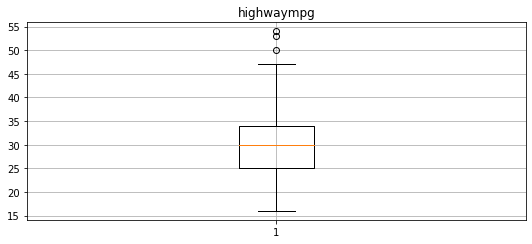

In [110]:
int_col = df.dtypes[df.dtypes==int].index

for col in int_col:
    ax = plt.boxplot( df[col])
    plt.title(f"{col}")
    plt.grid()
    plt.show()

<AxesSubplot:ylabel='Frequency'>

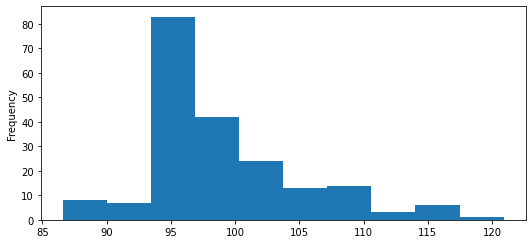

In [62]:
df.wheelbase.plot.hist()

In [126]:
df_no_outlier=df[df.highwaympg<51]

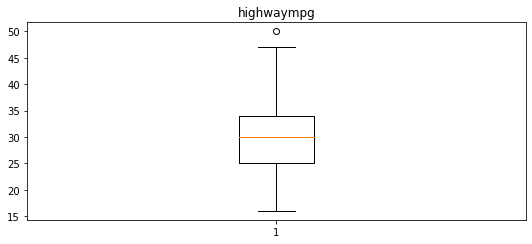

In [127]:
int_col = ["highwaympg"]

for col in int_col:
    df_plot=df_no_outlier[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

In [132]:
## You have to it for rest of the features
df_no_int_outlier=df[(df.highwaympg<50) & (df.horsepower<200) & ()]
df_no_int_outlier.horsepower.max()

184

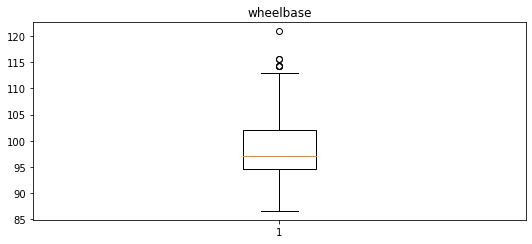

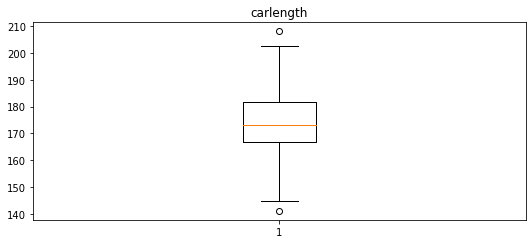

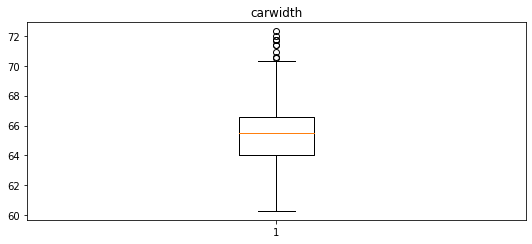

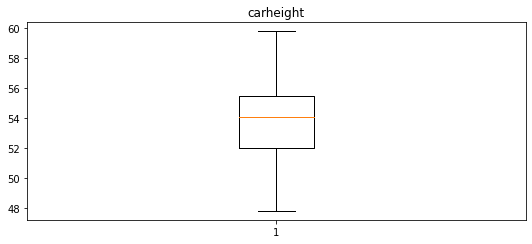

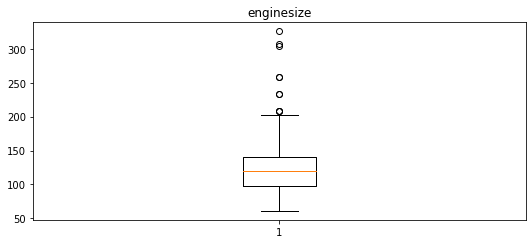

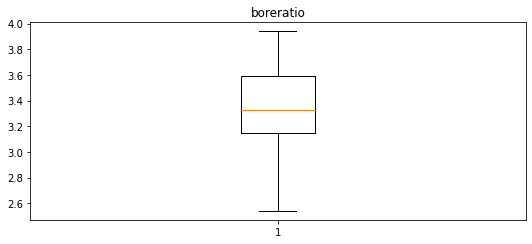

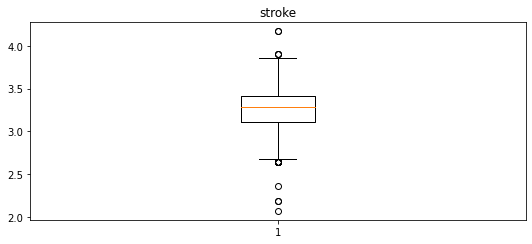

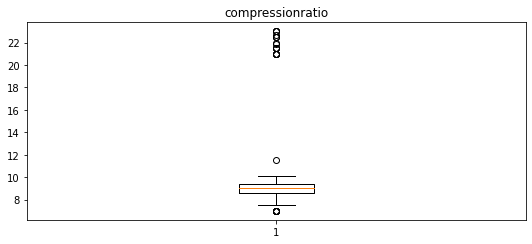

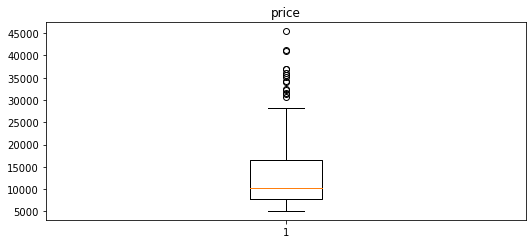

In [133]:
## Write your own code for float, looking at int


## Feauture Encoding

In [134]:
cat_col = df.dtypes[df.dtypes==object].index

for col in cat_col:
    print(df[col].value_counts())
    print("==================================")

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc custom        1
mazda glc custom l      1
mazda glc 4             1
mazda rx2 coupe         1
volvo diesel            1
Name: CarName, Length: 143, dtype: int64
gas       182
diesel     19
Name: fueltype, dtype: int64
std      165
turbo     36
Name: aspiration, dtype: int64
four    113
two      88
Name: doornumber, dtype: int64
sedan          95
hatchback      68
wagon          24
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    117
rwd     75
4wd      9
Name: drivewheel, dtype: int64
front    198
rear       3
Name: enginelocation, dtype: int64
ohc      144
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      157
six        23
five       10
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi  

In [ ]:
##first replace the values manually
## Then use one hot encoding

In [135]:
df_encondig = df[["aspiration","doornumber",""]]

In [136]:
df_encondig

,aspiration,doornumber
0,std,two
1,std,two
2,std,two
3,std,four
4,std,four
...,...,...
199,turbo,four
200,std,four
201,turbo,four
202,std,four


In [137]:
encoded_df =pd.get_dummies(df_encondig)
encoded_df.head()

,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,1,0
4,1,0,1,0
...,...,...,...,...
199,0,1,1,0
200,1,0,1,0
201,0,1,1,0
202,1,0,1,0


In [139]:
df.doornumber.value_counts()

four    113
two      88
Name: doornumber, dtype: int64